In [26]:
import mglearn

from sklearn.datasets import make_blobs, load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut, ShuffleSplit, GroupKFold

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

In [2]:
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print(f"Testing set score: {logreg.score(X_test, y_test):.2f}")

Testing set score: 0.88


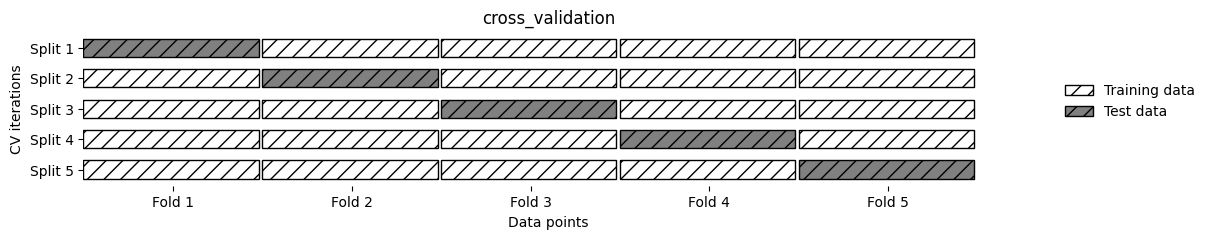

In [5]:
# 5.1. Cross-Validation

mglearn.plots.plot_cross_validation()

In [ ]:
# 5.1.1. Cross-Validation in scikit-learn

scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
print(f"Cross validation score: {scores}")

Cross validation score: [0.98 0.96 0.98]


In [9]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print(f"Cross validation score: {scores}")

Cross validation score: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [10]:
print(f"Cross validation score mean: {scores.mean():.2f}")

Cross validation score mean: 0.97


In [12]:
# 5.1.3. Stratified k-Fold Cross-Validation and Other Strategies

print(f"Iris labels:\n{iris.target}")

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


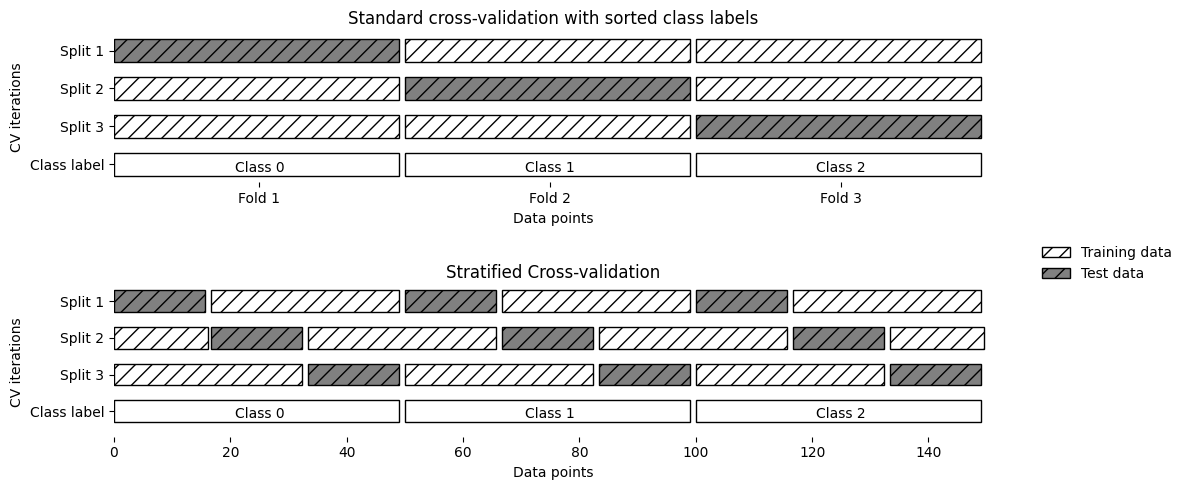

In [13]:
mglearn.plots.plot_stratified_cross_validation()

In [16]:
kfold = KFold(n_splits=5)
print(f"Cross validation score:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}")

Cross validation score:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [17]:
kfold = KFold(n_splits=3)
print(f"Cross validation score:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}")

Cross validation score:
[0. 0. 0.]


In [18]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print(f"Cross validation score:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}")

Cross validation score:
[0.98 0.96 0.96]


In [20]:
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of iterations cv: ", len(scores))
print(f"Mean accuracy: {scores.mean():.2f}")


Number of iterations cv:  150
Mean accuracy: 0.97


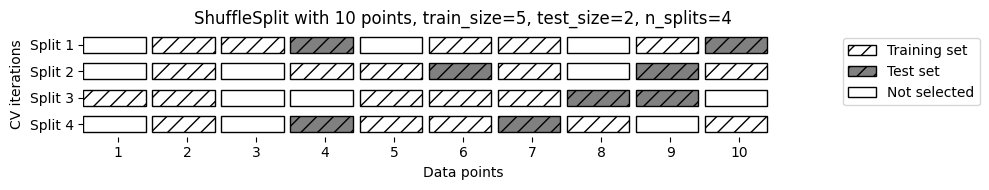

In [21]:
mglearn.plots.plot_shuffle_split()

In [25]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print(f"Cross validation score:\n{scores}")

Cross validation score:
[0.98666667 0.94666667 0.94666667 0.97333333 0.97333333 0.97333333
 0.94666667 0.97333333 0.97333333 0.97333333]


In [31]:
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print(f"Cross validation score:\n{scores}")

Cross validation score:
[0.75       0.6        0.66666667]


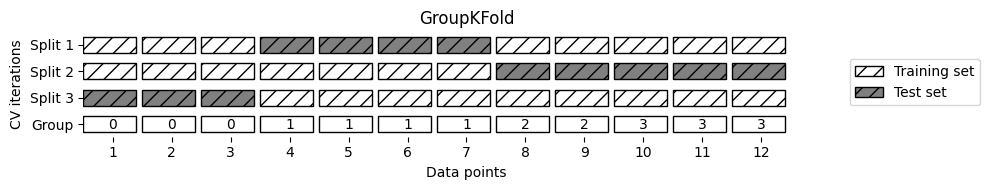

In [33]:
mglearn.plots.plot_group_kfold()